In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import datetime as dt

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import keras
from keras import backend as K

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

Using TensorFlow backend.


### Plotting the images

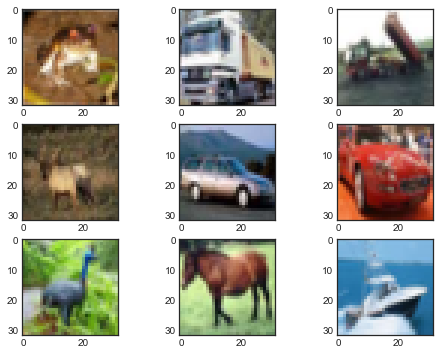

In [3]:
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [4]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [5]:
seed = 7
numpy.random.seed(seed)

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalizing the matrices

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Dividing the y_train and y_test into 10 dimensional vector for 10 classes using One Hot encoder

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 16, 16)        36928     
__________

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.0, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [15]:
numpy.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 1421s 28ms/step - loss: 1.9290 - acc: 0.2930 - val_loss: 1.6282 - val_acc: 0.4137
Epoch 2/25
50000/50000 [==============================] - 1413s 28ms/step - loss: 1.5285 - acc: 0.4455 - val_loss: 1.3659 - val_acc: 0.5051
Epoch 3/25
50000/50000 [==============================] - 1418s 28ms/step - loss: 1.3496 - acc: 0.5127 - val_loss: 1.3271 - val_acc: 0.5194
Epoch 4/25
50000/50000 [==============================] - 1416s 28ms/step - loss: 1.2219 - acc: 0.5603 - val_loss: 1.1682 - val_acc: 0.5895
Epoch 5/25
50000/50000 [==============================] - 1424s 28ms/step - loss: 1.1296 - acc: 0.5943 - val_loss: 1.1130 - val_acc: 0.6053
Epoch 6/25
50000/50000 [==============================] - 1417s 28ms/step - loss: 1.0568 - acc: 0.6235 - val_loss: 1.0305 - val_acc: 0.6316
Epoch 7/25
50000/50000 [==============================] - 1417s 28ms/step - loss: 0.9889 - acc: 0.6459 - val_l

### The last step accuracy and loss has reached upto 83.01 % and 0.4754 resp. but the validation accuracy and loss is still ~77 % and 0.6792 resp.

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('valid loss:', score[0])
print('valid accuracy:', score[1])

valid loss: 0.679164549494
valid accuracy: 0.7697


In [17]:
pred = model.predict(X_test)

In [29]:
pred.shape

(10000, 10)

### Pred represent the probabilities of the different classes for each image

In [18]:
pred

array([[  1.92260981e-04,   8.63358655e-05,   2.39072848e-04, ...,
          1.89945349e-04,   8.55707156e-04,   6.34972748e-05],
       [  1.00589707e-04,   9.39849779e-05,   1.43279353e-08, ...,
          3.61643840e-11,   9.99805033e-01,   3.79198013e-07],
       [  2.32722401e-03,   8.09144694e-04,   1.07313417e-05, ...,
          5.92567994e-06,   9.96483088e-01,   2.26544566e-04],
       ..., 
       [  4.64122104e-06,   2.91712524e-07,   4.40762332e-03, ...,
          1.84400808e-02,   1.08402435e-06,   3.47175529e-07],
       [  2.20358789e-01,   6.39731169e-01,   5.68589270e-02, ...,
          1.04096148e-03,   8.94087658e-04,   1.46153092e-04],
       [  2.42993980e-09,   2.64573502e-10,   3.70274165e-06, ...,
          7.30384707e-01,   1.43581341e-10,   1.29784711e-10]], dtype=float32)

In [26]:
pred_classes = np.argmax(pred , axis = 1)
ImageId = range( 1 , len(pred_digits)+1 )

In [27]:
pred_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [21]:
len(ImageId)

10000

In [28]:
context = {"ImageId" : ImageId , "Label" : pred_classes }
ans = pd.DataFrame(context)

In [23]:
ans.head()

,ImageId,Label
0,1,3
1,2,8
2,3,8
3,4,0
4,5,6


In [24]:
ans.to_csv("Predictions by CNN_again.csv", index=None)